In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_csv("Real estate.csv")     #read the dataset

In [3]:
df.head()
df.describe()

,No,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
cdf = df[['house_age','house_price']]   # selected some features one X and Y
cdf.head(12)

,house_age,house_price
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1
5,7.1,32.1
6,34.5,40.3
7,20.3,46.7
8,31.7,18.8
9,17.9,22.1


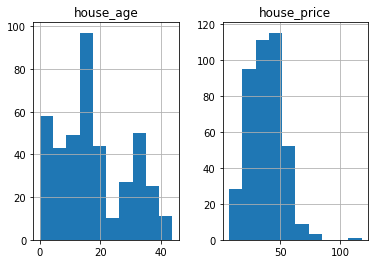

In [5]:
viz = cdf[['house_age','house_price']] 
viz.hist()
plt.show()

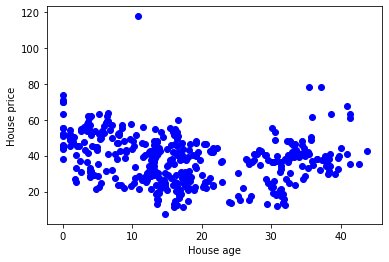

In [6]:
plt.scatter(cdf.house_age, cdf.house_price,  color='blue')   # plot the graph house_age vs house_price
plt.xlabel("House age")
plt.ylabel("House price")
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.7
train = cdf[msk]
test = cdf[~msk]

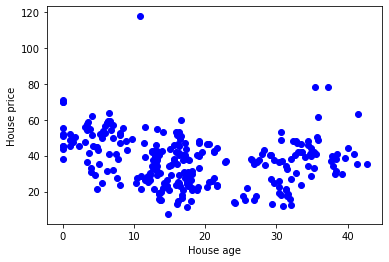

In [8]:
plt.scatter(train.house_age, train.house_price,  color='blue')     #training of distribution
plt.xlabel("House age")
plt.ylabel("House price")
plt.show()

In [9]:
regr = linear_model.LinearRegression()                          #modelling
train_x = np.asanyarray(train[['house_age']])
train_y = np.asanyarray(train[['house_price']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.27461577]]
Intercept:  [42.48909189]


Text(0, 0.5, 'House price')

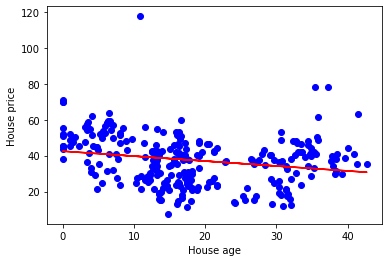

In [10]:
plt.scatter(train.house_age, train.house_price,  color='blue')              # plotting of fit line
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("House age")
plt.ylabel("House price")

In [11]:
test_x = np.asanyarray(test[['house_age']])                # Evaluation of model
test_y = np.asanyarray(test[['house_price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean square error (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

Mean absolute error (MAE): 10.32
Mean square error (MSE): 157.82
